In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [2]:
d = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
           'Mean': {},"CO":{},'Hart85':{},"FHMM_EXACT":{},
      "RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      "Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024},

  },

'train': {
    'datasets': {
      'Dataport': {
        'path': '../dataport2.hdf5',
        'buildings': {
          54: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          56: {
            'start_time': '2015-01-28',
            'end_time': '2015-02-12'
          },
          57: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          62: {
            'start_time': '2014-09-06',
            'end_time': '2014-09-20'
          },
          63: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          64: {
            'start_time': '2015-04-14',
            'end_time': '2015-04-28'
          },
          65: {
            'start_time': '2014-09-23',
            'end_time': '2014-10-07'
          },
          69: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          },
          71: {
            'start_time': '2014-12-25',
            'end_time': '2015-01-09'
          },
          72: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-14'
          }
        }

      }
    }
  },
  'test': {
    'datasets': {
      'Datport': {
        'path': '../dataport2.hdf5',
        'buildings': {
          94: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          103: {
            'start_time': '2014-01-26',
            'end_time': '2014-02-03'
          },
          113: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          117: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          },
          122: {
            'start_time': '2015-04-30',
            'end_time': '2015-05-07'
          }
        }
      }
    },
    'metrics': ['mae']
  }
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  CO
...............CO disaggregate_chunk running.............
Started Prediction using:  Hart85ing machine''
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Started Prediction using:  FHMM
Started Prediction using:  RNN
Started Prediction using:  Seq2Point
Started Prediction using:  Seq2Seq
 test New mains shape
(9982, 99, 1)
Started Prediction using:  DAE
Started Prediction using:  WindowGRU
............  mae  ..............
                        Mean          CO      Hart85  FHMM_EXACT        RNN  \
fridge             56.405132  127.670830   77.022125   56.203472  49.185215   
air conditioner   222.787109  252.564789  108.847420  130.567368  77.580231   
electric furnace   73.102295  161.689194   16.289186  311.914

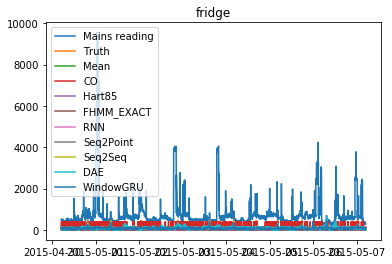

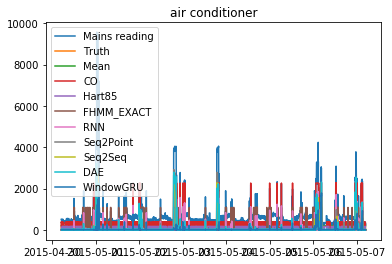

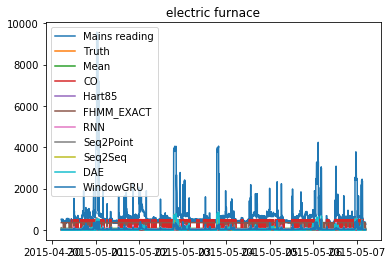

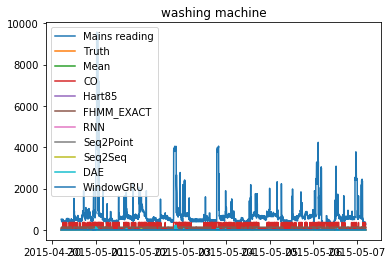

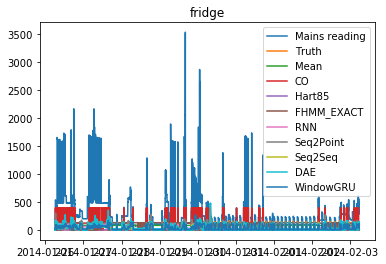

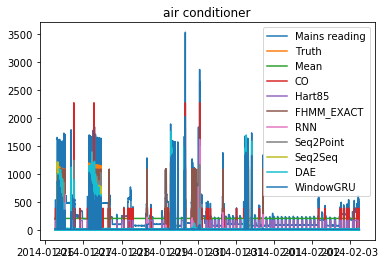

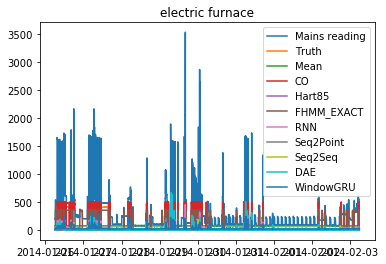

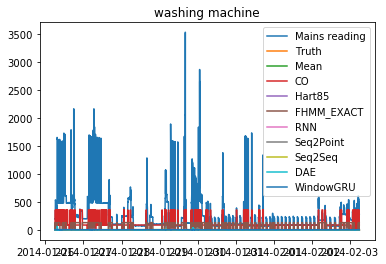

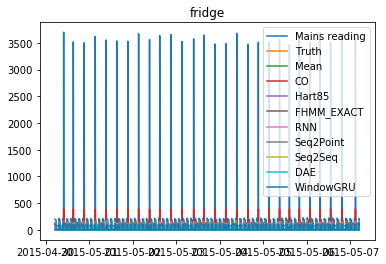

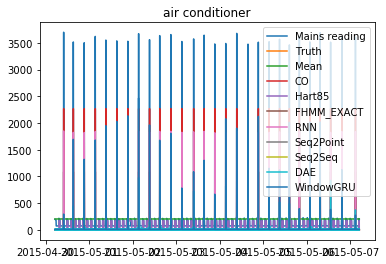

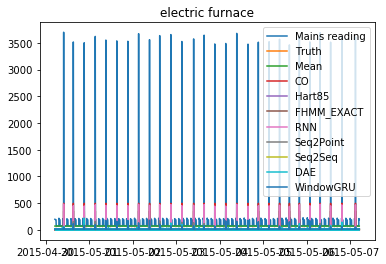

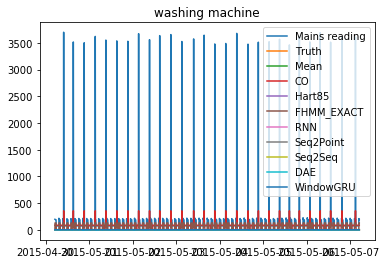

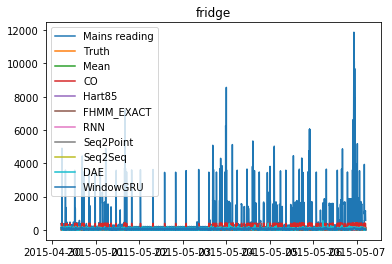

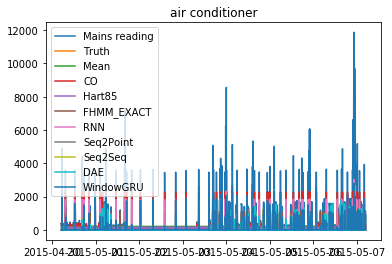

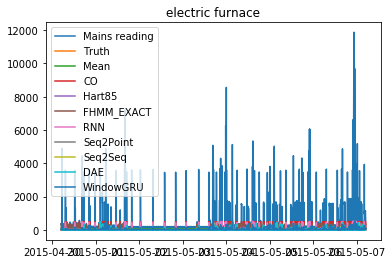

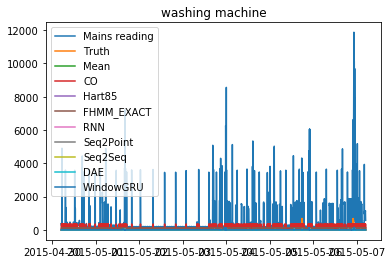

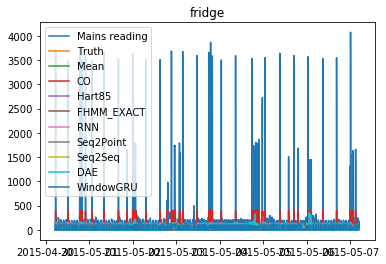

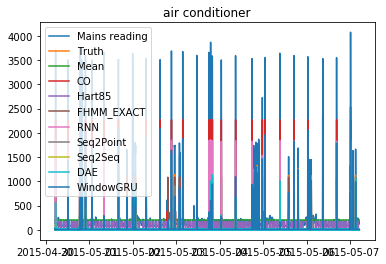

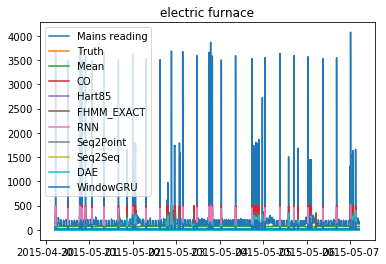

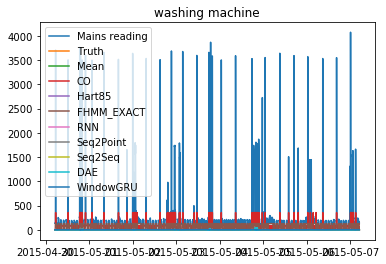

In [3]:

api_res = API(d)


In [6]:
for i in api_res.errors:
    print (i)
    print ('\n\n\n')

                        Mean          CO      Hart85  FHMM_EXACT        RNN  \
fridge             56.405132  127.670830   77.022125   56.203472  49.185215   
air conditioner   222.787109  252.564789  108.847420  130.567368  77.580231   
electric furnace   73.102295  161.689194   16.289186  311.914978  64.863129   
washing machine     5.046531  129.196030    0.790179   85.981049   4.603608   

                  Seq2Point    Seq2Seq        DAE  WindowGRU  
fridge            37.385685  42.659321  55.030190  43.310570  
air conditioner   64.631271  60.231651  70.018456  33.384499  
electric furnace  27.469875  25.649744  37.775719  34.413311  
washing machine    2.177832   2.047038   4.256865   4.519187  




                        Mean          CO     Hart85  FHMM_EXACT        RNN  \
fridge             74.519279   64.847656  29.324827   77.385590  46.357239   
air conditioner   221.088806   47.176998  64.124825   16.440018  17.571882   
electric furnace  103.222809   57.041492  48.590191

In [7]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean          CO     Hart85  FHMM_EXACT        RNN  \
fridge             63.310463   65.777407  41.111474   66.711900  37.784981   
air conditioner   224.838708   98.571174  86.803140   45.558858  45.981340   
electric furnace   81.581897   56.941474  19.370637   95.318022  37.097946   
washing machine     5.075050  105.931833   0.810945   59.994186   3.532573   

                  Seq2Point    Seq2Seq        DAE  WindowGRU  
fridge            23.744083  27.903839  33.772882  22.350656  
air conditioner   26.775317  29.639113  34.930756  30.715501  
electric furnace  25.629970  27.421116  30.292320  33.420447  
washing machine    2.102557   2.113368   2.808715   4.231595  



Standard Deviation
                       Mean         CO     Hart85  FHMM_EXACT        RNN  \
fridge             7.772509  42.338688  18.192112   23.535001   8.259449   
air conditioner   16.420339  85.771235  30.551202   44.644986  30.549266   
electric furnace  11.657662  55.4933